In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [258]:
insta=pd.read_csv("insta.csv",index_col=0)
webscrape=pd.read_csv("price.csv",index_col=0)
all_data=pd.read_csv("all.csv",index_col=0)

In [ ]:
##display image
from PIL import Image
import urllib.request
import io

URL =insta.image_url[100]

with urllib.request.urlopen(URL) as url:
    f = io.BytesIO(url.read())

img = Image.open(f)

img.show()

In [259]:
insta.shape

(953, 7)

In [274]:
insta.head(3)

blogger  comments              full_file_name  \
0  alexachung       118  26071 alexachung 12w ago 0   
1  alexachung        74   8767 alexachung 12w ago 1   
2  alexachung        53   7006 alexachung 12w ago 2   

                                           image_url  likes  \
0  https://scontent-iad3-1.cdninstagram.com/vp/d2...  26071   
1  https://scontent-iad3-1.cdninstagram.com/vp/85...   8767   
2  https://scontent-iad3-1.cdninstagram.com/vp/24...   7006   

                                             pic_cap post_date  
0                                     Purple hearts.   12w ago  
1  ALEXACHUNG.COM has this little number in the s...   12w ago  
2  ❤️ Popped down to @weareprojectzero space on B...   12w ago

In [270]:
insta.blogger.value_counts()

weworewhat       133
alexachung       117
chiara           100
songofstyle       87
fashiondiary      78
kyliejenner       60
oliviapalermo     60
oliviaculpo       60
gigihadid         60
helenabordon      60
juliahengel       53
heileybaldwin     49
imjennim          36
Name: blogger, dtype: int64

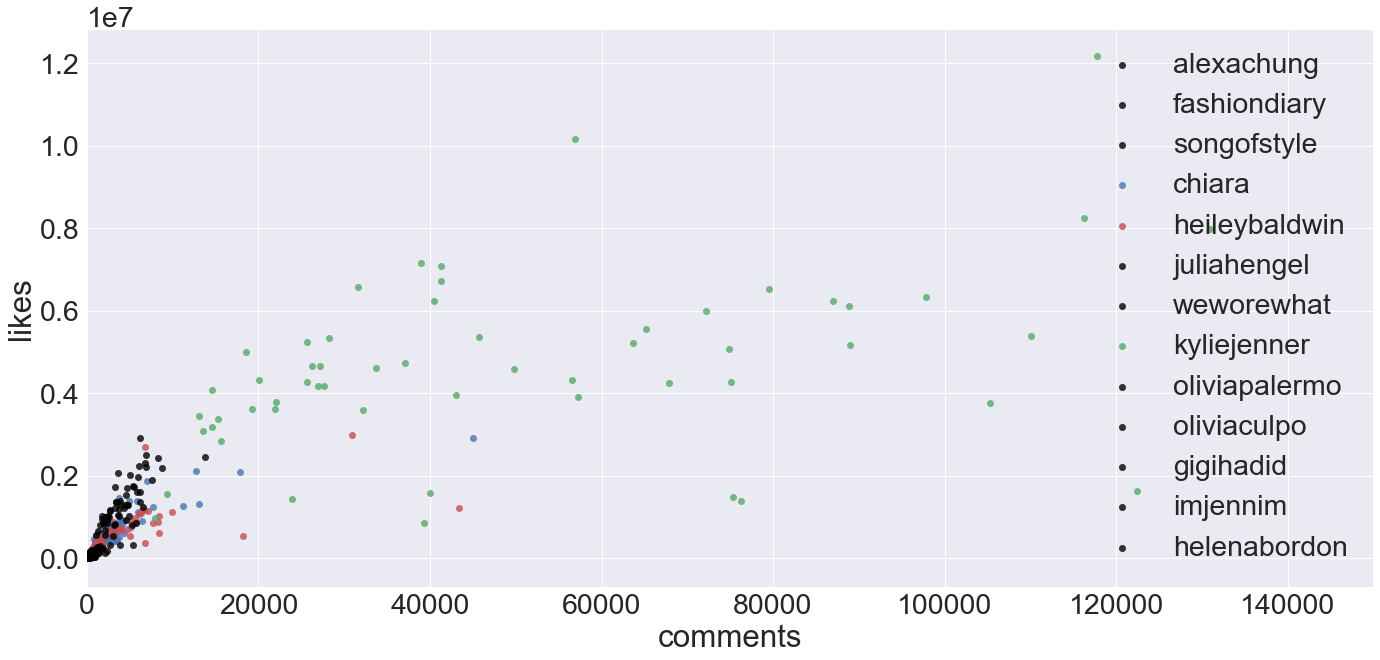

In [254]:
import seaborn as sns

#pal=dict("weworewhat"="k", "alexachung"="k","chiara"="k","songofstyle"= "k","fashiondiary"="k","oliviaculpo"="k","gigihadid"="k", "elenabordon"="k","oliviapalermo"="k","kyliejenner"="k","juliahengel"="k","heileybaldwin"="k","imjennim"="k")

#sns.set_palette("cubehelix", 13)
sns.set(font_scale=2.85)

ax=sns.lmplot(x="comments", y="likes", data=insta,fit_reg=False,hue="blogger", size=10,aspect=2, legend=False, palette=dict(weworewhat="k", alexachung="k",chiara="#4c72b0",songofstyle= "k",fashiondiary="k",oliviaculpo="k",gigihadid="k", helenabordon="k",oliviapalermo="k",kyliejenner="#55a868",juliahengel="k",heileybaldwin="#c44e52",imjennim="k"))




plt.legend(loc='lower right')
plt.xlim(0,150000)

plt.show()

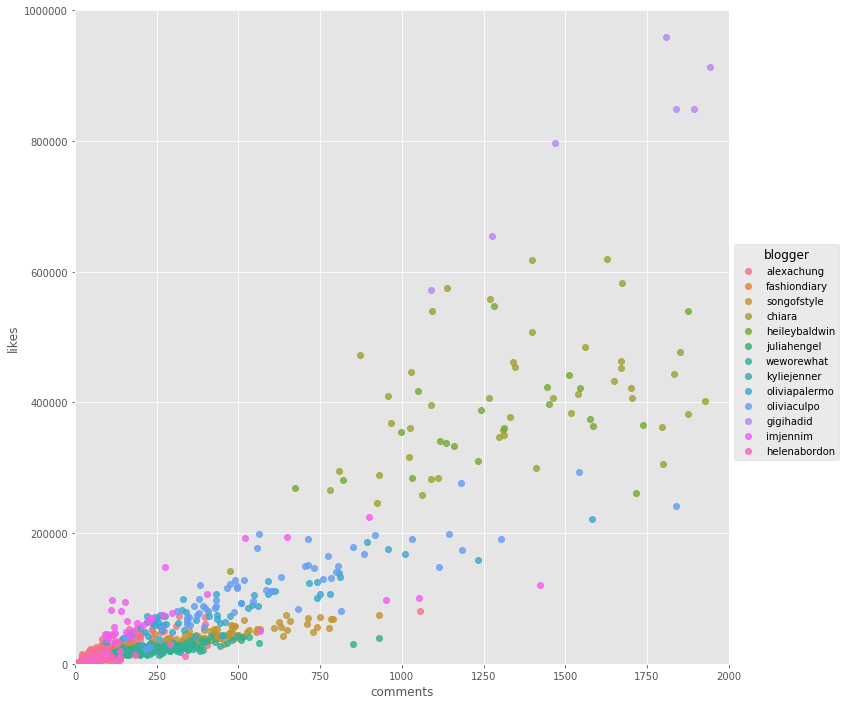

In [49]:
plot=sns.lmplot("comments", "likes", data=insta,fit_reg=False,hue="blogger", size=10)
sns.set_palette("cubehelix", 13)
plot.set(ylim=(0, 1000000))
plot.set(xlim=(0, 2000))

Text(0,0.5,'Likes')

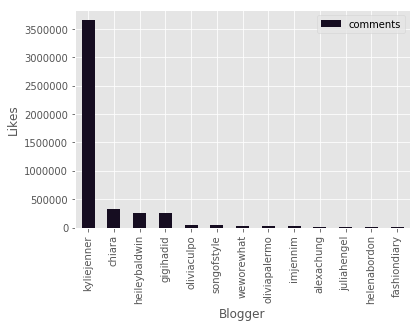

In [50]:
insta_plot=insta.groupby("blogger").agg({'comments': 'sum'}).sort_values(by="comments",ascending=False)
insta_plot.plot.bar()
plt.xlabel("Blogger")
plt.ylabel("Likes")


C:\Users\samuelmao\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The colors function was deprecated in version 2.1.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'Comments')

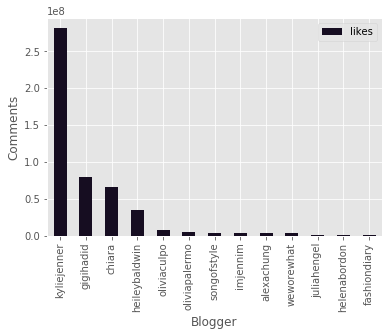

In [68]:
insta_plot_likes=insta.groupby("blogger").agg({'likes': 'sum'}).sort_values(by="likes",ascending=False)
insta_plot_likes.plot.bar()
plt.colors()
plt.xlabel("Blogger")
plt.ylabel("Comments")


C:\Users\samuelmao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'blogger' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Posts')

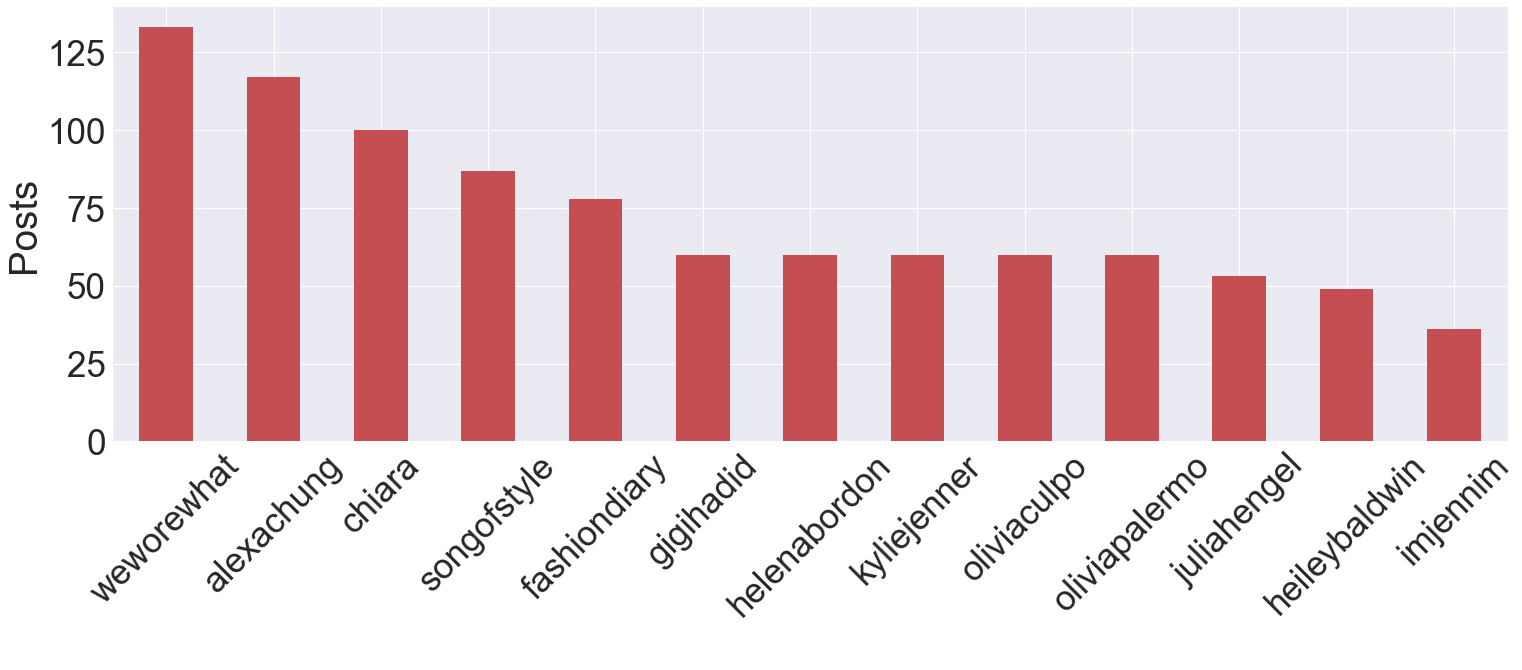

In [257]:
blogger_plot=insta.groupby("blogger").agg({"blogger":"count"}).sort_values(by="blogger",ascending=False)

blogger_plot.plot.bar(figsize=(25,8),color="#c44e52",legend=False)
sns.set(font_scale=3.5)
plt.xticks(rotation=45)
plt.xlabel(" ")
plt.ylabel("Posts")


Text(0.5,0,' ')

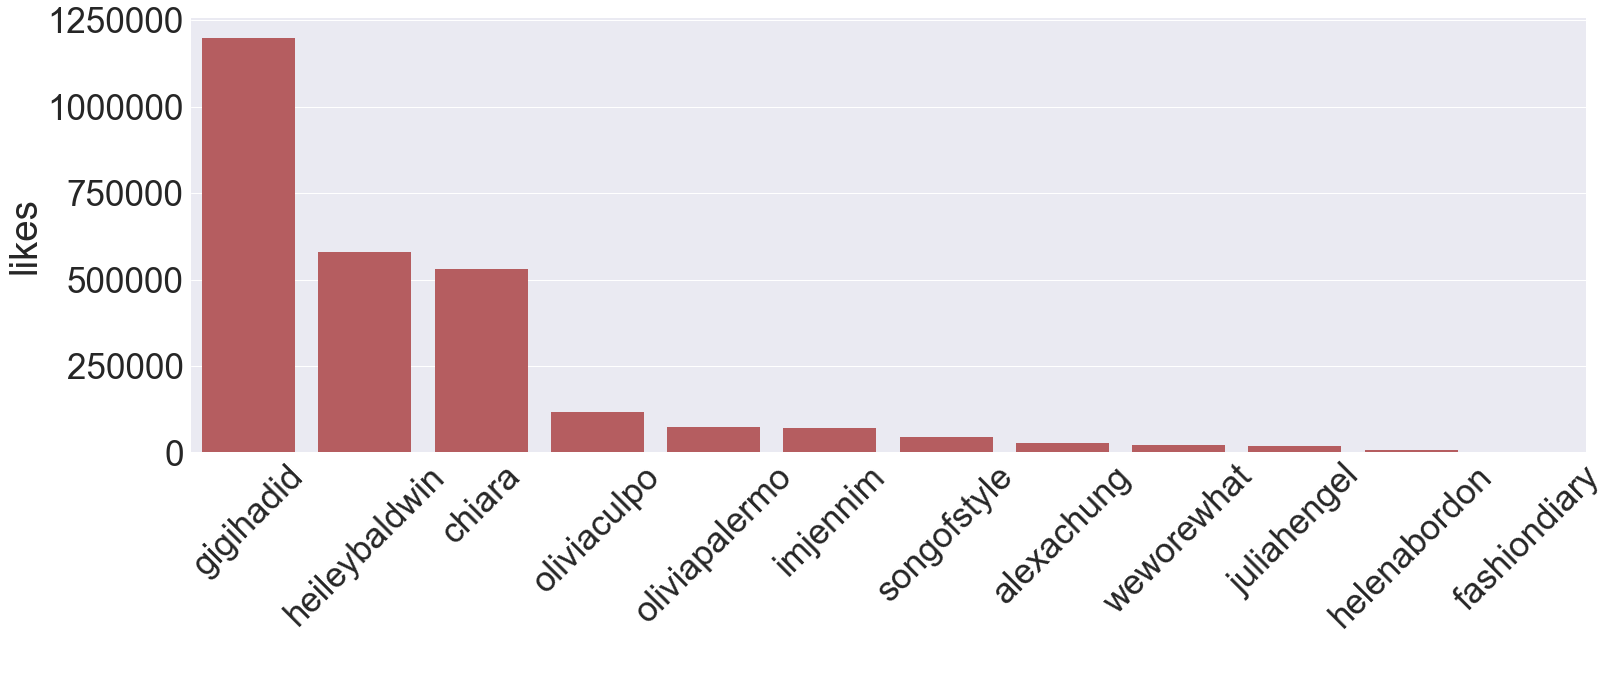

In [256]:
nokj=insta[insta.blogger!="kyliejenner"]


#likes_plot=likes_plot.reset_index()

plt.figure(figsize=(25,8))
p=sns.barplot(x="blogger", y="likes", data=likes_plot,color="#c44e52",)

sns.set(font_scale=3.5)
plt.xticks(rotation=45)
plt.xlabel(" ")
#sns.set_style("#95a5a6")
#sns.set_palette("#95a5a6")


### Webscrape Price EDA

In [88]:
print(webscrape.head(n=5))
print(webscrape.shape)

  brand category  price          product_name website
0    HM      Top   4.99        Cotton T-shirt      HM
1    HM      Top  14.99     V-neck Jersey Top      HM
2    HM      Top   9.99  Jersey Top with Lace      HM
3    HM      Top   9.99            V-neck Top      HM
4    HM      Top   2.99   Jersey Camisole Top      HM
(36928, 5)


In [4]:
webscrape.price=webscrape.price.replace('[\$,]', '', regex=True).astype(float)

In [5]:
webscrape.groupby("website").agg({"price":"median"}).sort_values(by="price",ascending=False)

price
website              
Bloomingdales  159.00
Macy            69.50
ASOS            40.00
Fashion Nova    19.99
HM              19.99

Text(0.5,0,' ')

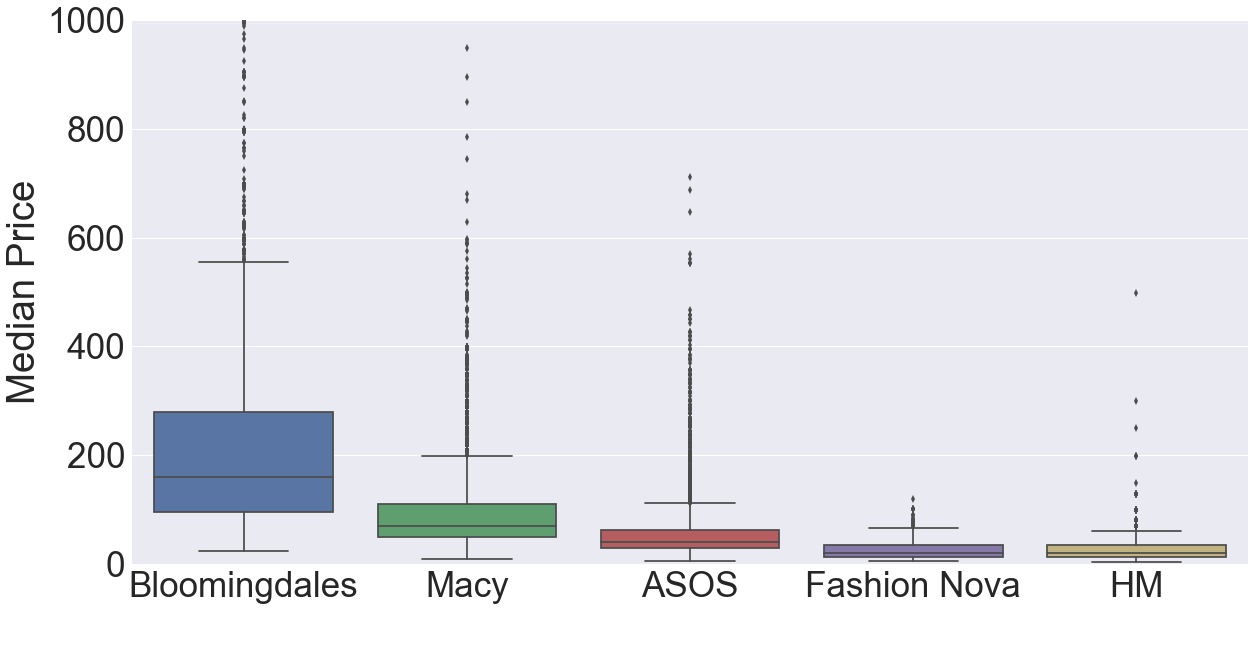

In [204]:
import seaborn as sns

# webscrape.boxplot(by="website", column="price",figsize=(13,12))
plt.figure(figsize=(20,10))
plt.ylim(0,1000)
sns.boxplot(x="website",y="price",data=webscrape,order=["Bloomingdales","Macy","ASOS","Fashion Nova","HM"])

plt.ylabel('Median Price')
plt.xlabel(" ")

### Original Data EDA

In [ ]:
print(all_data.shape)

In [ ]:
all_data.groupby("website").agg({"website":"count"}).sort_values(by="website",ascending=False)

In [ ]:
all_data.shape

In [271]:
all_data

alltext         brand  \
0      Cotton T-shirt T-shirt in lightweight cotton j...            HM   
1      V-neck Jersey Top Long-sleeved top in airy vis...            HM   
2      Jersey Top with Lace Sleeveless top in soft vi...            HM   
3      V-neck Top CONSCIOUS. V-neck top in airy jerse...            HM   
4      Jersey Camisole Top Fitted camisole top in jer...            HM   
5      Short T-shirt Short T-shirt in soft jersey wit...            HM   
6      Long T-shirt Long T-shirt in jersey with sewn ...            HM   
7          T-shirt Fitted T-shirt in soft jersey. Fitted            HM   
8      T-shirt T-shirt in soft, viscose-blend jersey....            HM   
9      V-neck Camisole Top V-neck camisole top in sof...            HM   
10     V-neck Jersey Top Short, fitted top in cotton ...            HM   
11         T-shirt Fitted T-shirt in soft jersey. Fitted            HM   
12     V-neck Top Top in woven fabric with V-neck fro...            HM   
13     T-shirt T-shirt in soft, viscose-blend jersey....            HM   
14     Cotton T-shirt T-shirt in lightweight cotton j...            HM   
15     T-shirt with Motif T-shirt in jersey with a mo...            HM   
16     One-shoulder Top Sleeveless, fitted one-should...            HM   
17     Burnout-patterned T-shirt T-shirt in cotton-bl...            HM   
18     Ribbed Top Sleeveless top in a rib-knit nylon ...            HM   
19     Ribbed Tank Top Fitted tank top in ribbed, str...            HM   
20     V-neck Jersey Top V-neck top in soft slub jers...            HM   
21     Short Knot-detail Jersey Top Short fitted top ...            HM   
22     Open-backed Top Short-sleeved top in a soft, r...            HM   
23     Lace-trimmed Tank Top Tank top in a soft, fine...            HM   
24     Silk Top PREMIUM QUALITY. Top in airy, woven m...            HM   
25     T-shirt with Printed Design T-shirt in soft vi...            HM   
26     Sleeveless Jersey Top Sleeveless top in jersey...            HM   
27     Jersey Top with Lace Camisole top in thick rib...            HM   
28     Crinkled Top Sleeveless top in crinkled, woven...            HM   
29     Fine-knit Sweater Relaxed-fit, fine-knit sweat...            HM   
...                                                  ...           ...   
10580  Holding Back Shirt Dress - Black/White Availab...  Fashion Nova   
10581  Follow Your Bliss Dress - Black Available In B...  Fashion Nova   
10582  Tara Stripe Sweater Dress - Black Combo Availa...  Fashion Nova   
10583  Rally Up Sweater Dress - Black/Ivory Available...  Fashion Nova   
10584  Charlotte Midi Dress - Leopard Available In Le...  Fashion Nova   
10585  On Point Sweater Dress - Black/Mocha Available...  Fashion Nova   
10586  Peeping The Scene Midi Dress - Brown Available...  Fashion Nova   
10587  Don't Cross Me Bandage Dress - Dark Gold Avail...  Fashion Nova   
10588  Embrace The Ruffle Dress - Leopard Available I...  Fashion Nova   
10589  Curious Is This Serious Off Shoulder Dress - P...  Fashion Nova   
10590  Skylar Sweater Midi Dress - Rose/Combo Availab...  Fashion Nova   
10591  Janelle Off Shoulder Stripe Dress - Burgundy/B...  Fashion Nova   
10592  Brisa Lace Dress - Lavender Available In Laven...  Fashion Nova   
10593  Rally Up Sweater Dress - Plum/Ivory Available ...  Fashion Nova   
10594  Summer Nights Dress - Dusty Plum Available In ...  Fashion Nova   
10595  Taylor Keyhole Dress - Rose Available In Rose,...  Fashion Nova   
10596  Better Have Fun Dress - Pink Available In Pink...  Fashion Nova   
10597  Status Factor Dress - Taupe Multi Available In...  Fashion Nova   
10598  Single Mingle Mock Neck Dress - Light Rust Ava...  Fashion Nova   
10599  Red Light Mini Dress - Silver Available In Sil...  Fashion Nova   
10600  Time For Another Drink Dress - Black Available...  Fashion Nova   
10601  Under My Spell Dress - Gold Available In Gold,...  Fashion Nova   
10602  Zip Her Up Dress - Black Available In Black,Zi

### Color Plate

In [ ]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [208]:
pal = sns.color_palette(current_palette)
pal.as_hex()

['#4c72b0', '#55a868', '#c44e52', '#8172b2', '#ccb974', '#64b5cd']

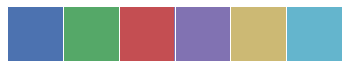

In [207]:
current_palette = sns.color_palette()
sns.palplot(current_palette)